</div>

# <center><div class="alert alert-success">Fraud detection in auto insurance claims</div></center>
### <div class="alert alert-danger">Problem Statement:</br> To predict the fraud in auto insurance claims based on the demographic, policy, claim, and vehilce related features provided in the datasets and also generate the top 20 patterns for fraud on target attribute.</div>
<div class="alert alert-info"> Data Provided: </br>
    1) Demographics Data: These files consist of the demographic data of each customer</br>
    2) Policy Information: These files consist of the customer auto insurance policy information,connected to the claim with the insurance company.</br>
    3) Data of Claim: These files consist of the details about the insurance claim, that the customer applied.</br>
    4) Data of Vehicle: These files consist of the details about the Vehicle. </br>
    5) Fraud Data: This Train.csv table contains the Fraud information details, like CustomerID, ReportedFraud.</div>
<div class="alert alert-warning">Evaluation metrics: </br> Just classifing a given customer details into fraud and Not fraud and blocking a genuine transaction for long time would bring bad impact on customer experience rather I consider providing probability score for each class and based on that the if there is a higher probability of transaction being fraud we might send that details to insurance company to have more checks instead of checking every customer details. Also by having more business understanding probability score helps to vary the threshold for considering any customer details as Fraud and Genuine.</br> 
    
    Further, as it is important for insurance company to not miss out on any Fraudulent cases, considering Precision, Recall, and F1-score as metric as it stress more on correctly classifying the case of TRUE POSITIVE will be more precise in this case.</br>
    
&#10148; Log-Loss</br>
&#10148; Confusion Metrics</br>
&#10148; F1-score / F1 statistic</br></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import log_loss, confusion_matrix, f1_score
from sklearn.metrics import classification_report

import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("TrainData.csv")
print(df.shape)
df.head()

(28836, 42)


,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,...,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,ReportedFraud
0,Cust10000,35,454776,MALE,JD,armed-forces,movies,56700,-48500,India,...,3,NO,1,0.0,YES,65501.0,13417,6071,46013,N
1,Cust10001,36,454776,MALE,JD,tech-support,cross-fit,70600,-48500,India,...,3,YES,2,1.0,YES,61382.0,15560,5919,39903,N
2,Cust10002,33,603260,MALE,JD,armed-forces,polo,66400,-63700,India,...,1,YES,2,3.0,NO,66755.0,11630,11630,43495,N
3,Cust10003,36,474848,MALE,JD,armed-forces,polo,47900,-73400,India,...,1,YES,2,3.0,NO,66243.0,12003,12003,42237,N
4,Cust10004,29,457942,FEMALE,High School,exec-managerial,dancing,0,-41500,India,...,1,NO,2,1.0,YES,53544.0,8829,7234,37481,N


In [3]:
#check for null values
df.isnull().sum().sum()

0

In [4]:
#check for duplicate values
df.duplicated().sum()

0

In [5]:
# stats for each column
df.describe()

,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,InsurancePolicyNumber,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,VehicleYOM,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
count,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,2.883600e+04,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000
mean,38.815370,502436.579068,23066.569566,-24940.612429,129312.517097,203.067867,1114.282529,1261.702646,9.836680e+05,2005.093113,11.764322,1.823207,0.985782,1.489076,52319.038355,7337.118428,7283.870197,37687.129387
std,7.996377,72250.868871,27637.813724,27913.209608,11114.060267,99.932951,546.632816,204.882387,1.969282e+06,5.309956,6.145568,0.980099,0.784764,1.040160,25080.664083,4427.638593,4375.842738,17977.048232
min,19.000000,430104.000000,0.000000,-111100.000000,110122.000000,1.000000,500.000000,436.280000,-1.000000e+06,1995.000000,0.000000,1.000000,0.000000,0.000000,150.000000,0.000000,0.000000,109.000000
25%,33.000000,448603.000000,0.000000,-50000.000000,119698.750000,126.000000,622.000000,1125.247500,0.000000e+00,2001.000000,6.000000,1.000000,0.000000,1.000000,44686.250000,4743.750000,4862.000000,32193.250000
50%,38.000000,466691.000000,0.000000,0.000000,129278.500000,199.000000,1000.000000,1265.205000,0.000000e+00,2005.000000,12.000000,1.000000,1.000000,1.000000,58360.000000,7147.000000,7051.000000,42457.500000
75%,44.000000,603848.000000,49000.000000,0.000000,138933.250000,267.000000,1627.000000,1396.605000,4.859610e+05,2010.000000,17.000000,3.000000,2.000000,2.000000,68961.750000,10571.250000,10327.000000,49535.750000
max,64.000000,620962.000000,100500.000000,0.000000,148619.000000,479.000000,2000.000000,2047.590000,1.000000e+07,2015.000000,23.000000,4.000000,2.000000,3.000000,114920.000000,21450.000000,23670.000000,79560.000000


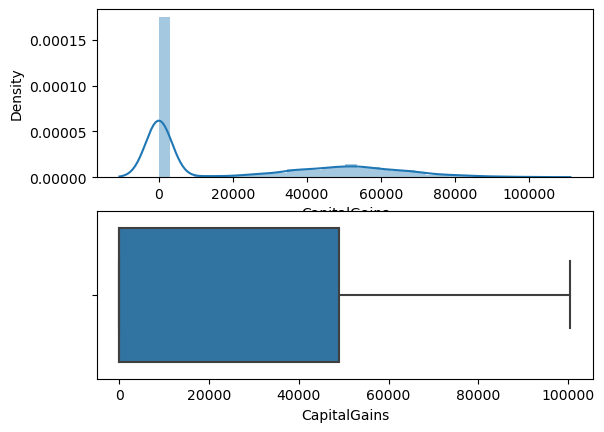

In [6]:
# verification for outliers in the data
def plot(data,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(data[col],ax=ax1)
    sns.boxplot(data[col],ax=ax2)
plot(df,'CapitalGains')

In [7]:
# Replacing the target variable with numerical representation 
df['ReportedFraud'].replace({'Y': 1, 'N': 0}, inplace=True)

In [8]:
# separate minority and majority classes
not_fraud = df[df.ReportedFraud==0]
fraud = df[df.ReportedFraud==1]

# Oversampling minority
fraud_upsampled = resample(fraud,replace=True,n_samples=len(not_fraud),random_state=27)

# combine majority and upsampled minority
df = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
df.ReportedFraud.value_counts()

0    21051
1    21051
Name: ReportedFraud, dtype: int64

### Creating a pipeline and building the model for fraud detection or not

In [9]:
x = df.drop('ReportedFraud', axis=1) # Features
y = df['ReportedFraud'] # Target variable

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
catcols = x.select_dtypes(include = ['object','bool']).columns
numcols = x.select_dtypes(include=['int64', 'float64']).columns

In [11]:
Numpipe = Pipeline([('scalar',StandardScaler())])
catpipe = Pipeline([('ohe',OneHotEncoder(handle_unknown='ignore'))])

preprocessor=(ColumnTransformer(transformers=[('num',Numpipe,numcols),('cat',catpipe,catcols)]))

rf = Pipeline([('pp',preprocessor),('RF',RandomForestClassifier(n_estimators = 600, criterion='gini',m))])

rf.fit(x_train, y_train)

train_pred = rf.predict(x_train)
test_pred = rf.predict(x_test)

In [12]:
#predict for x_test
train_pred_prob = rf.predict_proba(x_train)

test_pred_prob = rf.predict_proba(x_test)

In [13]:
# train data logloss and f1-score
print("The Log-Loss for a Random Model is: ",log_loss(y_train,train_pred_prob))

print("The F1-Score for a Random Model is: ",f1_score(y_train,train_pred))

The Log-Loss for a Random Model is:  0.050221244027252906
The F1-Score for a Random Model is:  1.0


In [14]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16813
           1       1.00      1.00      1.00     16868

    accuracy                           1.00     33681
   macro avg       1.00      1.00      1.00     33681
weighted avg       1.00      1.00      1.00     33681



In [15]:
# train data logloss and f1-score
print("The Log-Loss for a Random Model is: ",log_loss(y_test,test_pred_prob))

print("The F1-Score for a Random Model is: ",f1_score(y_test,test_pred))

The Log-Loss for a Random Model is:  0.1626158713109998
The F1-Score for a Random Model is:  0.979937903033198


In [16]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4238
           1       0.98      0.98      0.98      4183

    accuracy                           0.98      8421
   macro avg       0.98      0.98      0.98      8421
weighted avg       0.98      0.98      0.98      8421



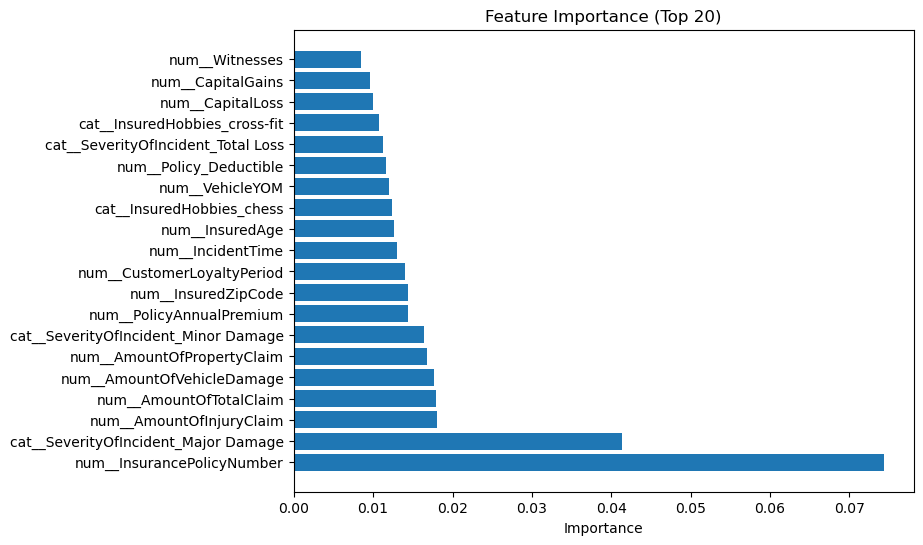

In [17]:
colz=rf[:-1].get_feature_names_out()
# Calculate feature importance using random forest model
feature_importance = pd.Series(rf.get_params()['RF'].feature_importances_, index=colz)

# Get the top 20 features with highest importance and plot them
top_20 = feature_importance.nlargest(20)
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(top_20.index, top_20.values)
ax.set_xlabel('Importance')
ax.set_title('Feature Importance (Top 20)')

# Show the plot
plt.show()

## Predicting on the TestData.csv

In [18]:
dftest = pd.read_csv(r"C:\Users\Soorya\OneDrive\Desktop\NEWTRY\testing\TestData.csv")

print(dftest.shape)
dftest.head()

(8912, 41)


,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,...,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
0,Cust10008,27,471704,FEMALE,High School,adm-clerical,base-jumping,56400,-57000,India,...,4.0,3,NO,0,0.0,YES,68354.0,6835,8059,53460
1,Cust10010,40,455810,FEMALE,MD,prof-specialty,golf,56700,-65600,India,...,16.0,1,YES,1,1.0,YES,55270.0,8113,5240,41917
2,Cust10015,39,461919,MALE,JD,other-service,movies,30400,0,India,...,20.0,3,NO,0,1.0,YES,59515.0,7490,9110,42915
3,Cust10020,38,600904,FEMALE,Masters,exec-managerial,video-games,68500,0,India,...,10.0,1,YES,2,1.0,NO,4941.0,494,866,3581
4,Cust1003,29,430632,FEMALE,PhD,sales,board-games,35100,0,India,...,7.0,3,NO,2,3.0,NO,34650.0,7700,3850,23100


In [19]:
testpred = rf.predict(dftest)
testpred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [20]:
dfmerge = pd.read_csv(r"C:/Users/Soorya/OneDrive/Desktop/NEWTRY/testing/Test.csv")
dfpreds = pd.DataFrame({'CustomerID': dfmerge['CustomerID'], 'ReportedFraud': testpred})

# Save the predictions in a CSV file
dfpreds.to_csv('Soorya_Predictions.csv', index=False)